In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Airbnb Data Playbook for Istanbul

This notebook is created to investigate some properties related to the Airbnb Istanbul data. This notebook is gonna be a living project with possibly adding new questions and trying to answer them.

**These are the questions that I'm gonna investigate in the near future:**
- Predict price for a new listing (listing is a record item)
- Check out the features affecting price the most
- The most popular neighborhoods (winter & summer, availability?)
- Neighborhoods getting the most reviews (up-to-date?)

**And, questions for the future:**
- Seasonal availability ratio for the listings/neighborhoods
- How positive is the reviewer?

## Data Exploration

Let's have a look at the columns and check whether we have informative values or not.

In [2]:
items = pd.read_csv('airbnb_istanbul/listings.csv', index_col='id')
print(items.shape)
items.head(3)

(19727, 105)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (43,61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4826,https://www.airbnb.com/rooms/4826,20190629051244,2019-06-29,The Place,My place is close to great views. My place is ...,A double bed apartment on the Asian side of Is...,My place is close to great views. My place is ...,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/15347/ba87...,NaN,6603,https://www.airbnb.com/users/show/6603,Kaan,2009-01-14,"Istanbul, Istanbul, Turkey","Hello...\r\nI am Kaan and I am from Istanbul, ...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/6603/profile_...,https://a0.muscache.com/im/users/6603/profile_...,Üsküdar,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"Istanbul Province, Istanbul, Turkey",Üsküdar,Uskudar,NaN,Istanbul Province,Istanbul,34684,Istanbul,"Istanbul Province, Turkey",TR,Turkey,41.05650,29.05367,f,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Smoking ...",700.0,$607.00,NaN,NaN,NaN,NaN,2,$150.00,1,730,1,1,730,730,1.0,730.0,26 months ago,t,30,60,90,365,2019-06-29,1,0,2009-06-01,2009-06-01,100.0,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,1,1,0,0,0.01
20815,https://www.airbnb.com/rooms/20815,20190629051244,2019-06-29,The Bosphorus from The Comfy Hill,Watch The Bosphorus from The Comfy Hill. A spa...,"The low green hills of Arnavutköy, the lovely,...",Watch The Bosphorus from The Comfy Hill. A spa...,none,"The lovely neighborhood, Arnavutkoy, is locate...",The house may be suited with extra inflatable ...,"The city center, Taksim is about 6-7 kilometer...",Our dear guests may enjoy the oven and the was...,"Depending on our time available, we may even t...",- Windows facing the street should not be left...,NaN,NaN,https://a0.muscache.com/im/pictures/94805791/4...,NaN,78838,https://www.airbnb.com/users/show/78838,Gülder,2010-02-08,"Ankara, Ankara, Turkey",Başar Family\r\n\r\nGülder (mother): Owner of ...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/78838/profile...,https://a0.muscache.com/im/users/78838/profile...,Beşiktaş,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'wor...",t,f,"Istanbul, Turkey",Beşiktaş,Besiktas,NaN,Istanbul,NaN,34345,Istanbul,"Istanbul, Turkey",TR,Turkey,41.0698

We have 105 columns. First: clean the columns with many nan values.  
I've defined the threshold as 80%.

In [3]:
nan_columns = items.columns[items.isnull().sum() / len(items) > 0.8 ]
items.drop(nan_columns,axis=1,inplace=True)
items.shape

(19727, 95)

Clean the rows with many nan values. I'm gonna use the same threshold.

In [4]:
items[items.isnull().sum(axis=1) / items.shape[1] > 0.8]

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


Rows seem healthy enough, and we have done the first cleaning steps.  
We can check general info of the dataframe.

In [5]:
items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19727 entries, 4826 to 36183972
Data columns (total 95 columns):
listing_url                                     19727 non-null object
scrape_id                                       19727 non-null int64
last_scraped                                    19727 non-null object
name                                            19646 non-null object
summary                                         17389 non-null object
space                                           10779 non-null object
description                                     18240 non-null object
experiences_offered                             19727 non-null object
neighborhood_overview                           9133 non-null object
notes                                           4761 non-null object
transit                                         8526 non-null object
access                                          6925 non-null object
interaction                                     78

Seems like we have many object datatyped columns.  
Next: investigate these columns if they carry useful information or not

In [6]:
objects = items.columns[items.dtypes == object]
print(objects)
items[objects].head(3)

Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'access', 'interaction', 'house_rules', 'picture_url',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed', 'city', 'state',
       'zipcode', 'market', 'smart_location', 'country_code', 'country',
       'is_location_exact', 'property_type', 'room_type', 'bed_type',
       'amenities', 'price', 'security_deposit', 'cleaning_fee',
       'extra_people', 'calendar_updated', 'has_availability',
       'calendar_last_scraped', 'first_review', 'last_review',
       'requires_license', 'instant_bookable', 'is_business_travel_ready

,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,is_location_exact,property_type,room_type,bed_type,amenities,price,security_deposit,cleaning_fee,extra_people,calendar_updated,has_availability,calendar_last_scraped,first_review,last_review,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4826,https://www.airbnb.com/rooms/4826,2019-06-29,The Place,My place is close to great views. My place is ...,A double bed apartment on the Asian side of Is...,My place is close to great views. My place is ...,none,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/15347/ba87...,https://www.airbnb.com/users/show/6603,Kaan,2009-01-14,"Istanbul, Istanbul, Turkey","Hello...\r\nI am Kaan and I am from Istanbul, ...",NaN,NaN,f,https://a0.muscache.com/im/users/6603/profile_...,https://a0.muscache.com/im/users/6603/profile_...,Üsküdar,"['email', 'phone', 'facebook', 'reviews']",t,f,"Istanbul Province, Istanbul, Turkey",Üsküdar,Uskudar,Istanbul Province,Istanbul,34684,Istanbul,"Istanbul Province, Turkey",TR,Turkey,f,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Smoking ...",$607.00,NaN,NaN,$150.00,26 months ago,t,2019-06-29,2009-06-01,2009-06-01,f,f,f,flexible,f,f
20815,https://www.airbnb.com/rooms/20815,2019-06-29,The Bosphorus from The Comfy Hill,Watch The Bosphorus from The Comfy Hill. A spa...,"The low green hills of Arnavutköy, the lovely,...",Watch The Bosphorus from The Comfy Hill. A spa...,none,"The lovely neighborhood, Arnavutkoy, is locate...",The house may be suited with extra inflatable ...,"The city center, Taksim is about 6-7 kilometer...",Our dear guests may enjoy the oven and the was...,"Depending on our time available, we may even t...",- Windows facing the street should not be left...,https://a0.muscache.com/im/pictures/94805791/4...,https://www.airbnb.com/users/show/78838,Gülder,2010-02-08,"Ankara, Ankara, Turkey",Başar Family\r\n\r\nGülder (mother): Owner of ...,NaN,NaN,f,https://a0.muscache.com/im/users/78838/profile...,https://a0.muscache.com/im/users/78838/profile...,Beşiktaş,"['email', 'phone', 'facebook', 'reviews', 'wor...",t,f,"Istanbul, Turkey",Beşiktaş,Besiktas,Istanbul,NaN,34345,Istanbul,"Istanbul, Turkey",TR,Turkey,t,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",""Air conditioning"",Kitchen,""Fre...",$110.00,$572.00,NaN,$202.00,5 months ago,t,2019-06-29,2010-03-24,2018-11-07,f,f,f,moderate,t,f
25436,https://www.airbnb.com/rooms/25436,2019-06-29,House for vacation rental furnutare,Evimiz Bebek Koru nun içinde . Şehrin içinde ...,This place so popular place in Istanbul.Bospho...,Evimiz Bebek Koru nun içinde . Şehrin içinde ...,none,Clean and elegand friends . U can find everyth...,NaN,"Otobus , Vapur , Metro , taksi",NaN,Yes I can arrange it,NaN,https://a0.muscache.com/im/pictures/b64c3ef0-2...,https://www.airbnb.com/users/show/105823,Yesim,2010-04-09,"Istanbul, Istanbul, Turkey",Merhabalar . 6 yasında Oğlum ile birlikte yaşa...,NaN,NaN,f,https://a0.muscache.com/im/users/105823/profil...,https://a0.muscache.com/im/users/105823/profil...,Beşiktaş,"['email', 'phone', 'offline_government_id', 's...",t,f,"Beşiktaş/ bebek, İstanbul, Turkey",Beşiktaş,Besiktas,Beşiktaş/ bebek,İstanbul,34400,Istanbul,"Beşiktaş/ bebek, Turkey",TR,Turkey,t,Serviced apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$231.00,"$19,718.00",$0.00,$0.00,3 months ago,t,2019-06-29,NaN,NaN

In [7]:
items.requires_license.value_counts()

f    19727
Name: requires_license, dtype: int64

We can remove the columns that have same value for the entire dataset.  
And, the columns that have inconsistent values.

In [8]:
same_valued_columns = ['is_business_travel_ready', 'country_code','country', 'has_availability', 'calendar_last_scraped','requires_license','experiences_offered','last_scraped']
items.drop(same_valued_columns,axis=1,inplace=True)

inconsistent_valued_columns = ['city', 'state']
items.drop(inconsistent_valued_columns,axis=1,inplace=True)

In [9]:
items.shape

(19727, 85)

In [10]:
removed_columns = same_valued_columns + inconsistent_valued_columns
objects = list(set(objects) - set(removed_columns))

Now, we can check if the rest of the columns are categorical columns or just info columns with string values.

In [11]:
items.neighbourhood.value_counts()

Beyoglu            2812
Şişli              2812
Kadıköy            1736
Beşiktaş           1680
Fatih              1650
Taksim             1267
Sultanahmet         875
Üsküdar             762
Cihangir            754
Karaköy             660
Moda                261
Kadıköy Merkezi     205
Ortaköy             114
Aksaray              33
Eminönü              31
Name: neighbourhood, dtype: int64

In [12]:
items.drop('neighbourhood',axis=1,inplace=True)

In [13]:
binary_columns = ['host_is_superhost', 'instant_bookable', 'host_identity_verified', 'require_guest_phone_verification','host_has_profile_pic', 'is_location_exact','require_guest_profile_picture']
info_columns = ['space', 'street','notes', 'host_location', 'host_thumbnail_url','host_picture_url', 'listing_url','house_rules', 'picture_url', 'amenities', 'host_about', 'summary', 'description', 'calendar_updated','access','transit','host_name','neighborhood_overview', 'smart_location','host_url','interaction','host_verifications','name','zipcode']
price_columns = ['extra_people', 'price','cleaning_fee','security_deposit']
multi_categorical_columns = ['neighbourhood_cleansed','host_neighbourhood','host_response_time','host_response_rate','room_type', 'property_type','bed_type','market', 'cancellation_policy']
date_columns = ['last_review', 'host_since', 'first_review']


In [14]:
for column in binary_columns:
    items[column] = items[column].apply(lambda x: 1 if x == 't' else 0)

In [15]:
for column in info_columns:
    items[column] = items[column].apply(lambda x: 0 if pd.isna(x) else 1)

In [16]:
for column in price_columns:
    items[column] = [x if pd.isna(x) else int(x.replace(',','')) for x in [x if pd.isna(x) else x[1:-3] for x in items[column]]]


For multi categorical columns, get_dummies method can handle most of them to convert them into the numerical values, but for some of them manual analysis and extraction should be made. See below operations.

In [17]:
items.host_response_rate = [x if pd.isna(x) else int(x / 10) for x in [x if pd.isna(x) else int(x[:-1]) for x in items.host_response_rate]]


In [18]:
# TODO: analyze further, for now just removed for simplicity, they are not cleaned values
items.drop('host_neighbourhood',axis=1,inplace=True)

In [19]:
# TODO: extract year, month, day from these columns
items.drop(date_columns,axis=1,inplace=True)

Now, time to fill in missing values for numerical columns.

In [20]:
numerical_columns = items.columns[items.dtypes != 'object']
for column in numerical_columns:
    median_value=items[column].median()
    items[column]=items[column].fillna(median_value)

For the first task, we are gonna predict price for a new item, so our target variable is price.  
Next: Check if there are outliers for this column.

In [21]:
items.price.describe()

count    19727.000000
mean       377.366706
std       1291.115797
min          0.000000
25%        116.000000
50%        208.000000
75%        381.000000
max      65726.000000
Name: price, dtype: float64

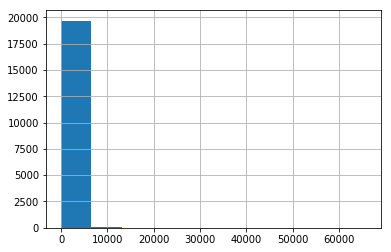

In [22]:
items.price.hist()

If we consider interquartile range calculation to find outliers:  
IQR = (381 - 116)
Outlier > 381 + (1.5 * IQR)   
So, we can safely assume that if price is above 1000, it is an outlier.

In [23]:
(items.price < 1000).sum() / len(items)

0.9561007755867592

In [24]:
listings = items[items.price < 1000]

In [25]:
X = listings.drop('price',axis=1)
y = listings['price']

In [26]:
scaler = StandardScaler()
numerical_columns = X.columns[X.dtypes != 'object']
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [27]:
dummied_items = pd.get_dummies(X,dummy_na=True)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(dummied_items,y,test_size=0.30,random_state=0)

In [29]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
linear_regression.score(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


0.40554909080616863

In [30]:
kn = KNeighborsRegressor()
kn.fit(X_train, y_train)
kn.score(X_train, y_train)

0.5515992590246928

In [31]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
gbr.score(X_train, y_train)

0.5150788546541532

In [32]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
tree.score(X_train, y_train)

0.9999934497501726

For the first iteration, knn or gradient boosting seems to produce meaningful results. Desicion tree is probably overfitting. To improve this, we need to complete feature preprocessing thoroughly and maybe try tunning hyperparameters for the algorithm.

TBC